In [43]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

ALL PARTICIPANTS

In [44]:
#graphicnovel condition
pretest_graphicnovel = pd.read_excel("pretest_gn_clean_40.xlsx",  index_col=0)
postest_graphicnovel = pd.read_excel("postest_gn_clean_40.xlsx",  index_col=0)
time_graphicnovel = pd.read_excel("time_gn_40.xlsx",  index_col=0)
# Filter time_graphicnovel to only include indexes present in pretest_graphicnovel
time_graphicnovel = time_graphicnovel[time_graphicnovel.index.isin(pretest_graphicnovel.index)]

#textonly condition
pretest_textonly = pd.read_excel("pretest_to_clean_40.xlsx",  index_col=0)
postest_textonly = pd.read_excel("postest_to_clean_40.xlsx",  index_col=0)
time_textonly = pd.read_excel("time_to_40.xlsx",  index_col=0)
# Filter time_textonly to only include indexes present in pretest_textonly
time_textonly = time_textonly[time_textonly.index.isin(pretest_textonly.index)]


In [45]:
# Concatenate with MultiIndex 
all_gn = pd.concat([time_graphicnovel, pretest_graphicnovel, postest_graphicnovel], axis=1, keys=['TIME', 'PRETEST', 'POSTEST'])
all_to = pd.concat([time_textonly, pretest_textonly, postest_textonly], axis=1, keys=['TIME', 'PRETEST', 'POSTEST'])

print(all_gn.shape)
print(all_to.shape)


(37, 66)
(39, 39)


In [46]:
# Save DataFrames to excel file
all_gn.to_excel('combined_graphicnovel_40.xlsx', index=True)
# Save DataFrames to excel file
all_to.to_excel('combined_textonly_40.xlsx', index=True)

DESCRIPTIVE STATISTICS

PRETEST

graphic novel

In [47]:
pretest_gn = all_gn["PRETEST"]
desc_pre_gn = pretest_gn.describe()
desc_pre_gn


,age,years_education,cefr_level,percentage,TV/movies,music/podcasts,pleasure_reading,academic_reading,friends/family,emails/messages,social,news/magazines,group
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,0.0
mean,28.567568,3.567568,4.918919,2.810811,4.081081,4.243243,2.729730,2.891892,2.081081,3.000000,3.783784,3.162162,NaN
std,7.436922,0.898781,1.010456,1.221061,0.721818,0.683350,1.193702,1.173404,0.982581,1.130388,1.157947,0.986394,NaN
min,22.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,24.000000,3.000000,4.000000,2.000000,4.000000,4.000000,2.000000,2.000000,1.000000,2.000000,3.000000,3.000000,NaN
50%,25.000000,4.000000,5.000000,3.000000,4.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,NaN
75%,30.000000,4.000000,6.000000,4.000000,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,NaN
max,53.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


text only

In [48]:
pretest_to = all_to["PRETEST"]
desc_pre_to = pretest_to.describe()
desc_pre_to

,age,years_education,cefr_level,percentage,TV/movies,music/podcasts,pleasure_reading,academic_reading,friends/family,emails/messages,social,news/magazines,group
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,0.0
mean,32.435897,3.538462,5.051282,2.769231,3.948718,4.025641,3.179487,2.974359,2.282051,3.410256,3.923077,3.589744,NaN
std,9.552610,0.941615,0.971941,1.134658,1.099012,1.012739,1.144134,1.180704,1.074800,1.229419,1.109400,1.018718,NaN
min,21.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,NaN
25%,26.000000,3.000000,4.000000,2.000000,3.000000,4.000000,2.500000,2.000000,1.500000,2.000000,3.500000,3.000000,NaN
50%,31.000000,3.000000,5.000000,3.000000,4.000000,4.000000,3.000000,3.000000,2.000000,4.000000,4.000000,4.000000,NaN
75%,36.000000,4.000000,6.000000,4.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,NaN
max,59.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


POSTESTS

graphic novel

In [49]:
postest_gn = all_gn["POSTEST"]
desc_post_gn = postest_gn.describe()
desc_post_gn

,Total points,"At points, I had a hard time making sense of what was going on in the story.",My understanding of the characters is unclear.,I had a hard time recognizing the main thread of the story.,I found my mind wandering while I was reading the story.,"While I was reading, I found myself thinking about other things.",I had a hard time keeping track keeping my mind on the story.,"While reading, my body was in the room but my mind was inside the world created by the story.","The story created a new world, and then that world suddenly disappeared when the story ended.","At times during reading, the story world was closer to me than the real world.",The story affected me emotionally.,"During reading, when something positive happened to the main character I felt happy, and when they suffered in some way I felt sad.",I felt sorry for some of the characters in the story.,I liked the style and quality of the illustrations,The distribution and division of the text into scenes was well done.,The images accompanying each scene of the graphic novel appropriately illustrated the scene's essence,"Overall, text and images accompanied each other well","If this story was part of a series, I would continue reading it.","Overall, I enjoyed reading this story",I am comfortable with the use of AI to illustrate narratives,I believe that AI-generated illustrations have less value than human-crafted ones,"I believe generative AI is a way to democratize art, making it accessible to all",Generative AI makes me angry,Generative AI scares me,Generative AI interests me,I believe generative AI steals artists' jobs,"I am often exposed to AI-generated textual content (e.g., generated by ChatGPT)","I am often exposed to AI-generated visual content (e.g., generated by Dall-E)","I regularly use AI-language generators (e.g., ChatGPT) when working with text","I regularly use AI-image generators (e.g., Dall-E, Midjourney) when working with images",I believe AI could help illustrate stories that would otherwise never be illustrated,I believe using AI as it was used in this study can make literature more appealing for a broader audience,I liked the style and quality of the illustrations.1,The distribution and division of the text into scenes was well done..1,The images accompanying each scene of the graphic novel appropriately illustrated the scene's essence.1,"Overall, text and images accompanied each other well.1","If this story was part of a series, I would continue reading it..1","Overall, I enjoyed reading this story.1","While reading the story, how often did you find yourself going back to re-read previous sections to understand the story better?"
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,37.00000
mean,14.297297,3.216216,3.648649,4.081081,3.675676,3.864865,4.027027,3.297297,3.432432,2.837838,2.864865,2.864865,3.27027,3.513514,3.432432,3.297297,3.351351,3.216216,3.783784,3.324324,2.351351,2.837838,3.621622,3.540541,3.567568,2.702703,3.486486,2.864865,3.324324,2.081081,3.432432,3.162162,2.333333,2.777778,3.222222,2.666667,2.666667,3.444444,3.27027
std,2.196776,1.003747,0.856875,0.829269,0.944400,0.976449,0.725966,0.811886,1.014904,1.014164,1.031777,1.004494,1.07105,1.260988,1.093936,1.127063,1.206837,1.250225,1.057648,1.179785,1.085670,0.986394,0.981817,1.168917,0.987155,1.050525,1.169559,1.182327,1.334459,1.163767,1.093936,1.041194,1.224745,1.201850,1.092906,1.322876,1.322876,0.881917,0.76915
min,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,

text only

In [50]:
postest_to = all_to["POSTEST"]
desc_post_to = postest_to.describe()
desc_post_to

,Total points,"At points, I had a hard time making sense of what was going on in the story.",My understanding of the characters is unclear.,I had a hard time recognizing the main thread of the story.,I found my mind wandering while I was reading the story.,"While I was reading, I found myself thinking about other things.",I had a hard time keeping track keeping my mind on the story.,"While reading, my body was in the room but my mind was inside the world created by the story.","The story created a new world, and then that world suddenly disappeared when the story ended.","At times during reading, the story world was closer to me than the real world.",The story affected me emotionally.,"During reading, when something positive happened to the main character I felt happy, and when they suffered in some way I felt sad.",I felt sorry for some of the characters in the story.,"If this story was part of a series, I would continue reading it.","Overall, I enjoyed reading this story","While reading the story, how often did you find yourself going back to re-read previous sections to understand the story better?"
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,14.948718,3.179487,4.000000,3.897436,3.564103,3.871795,3.692308,3.589744,3.358974,3.076923,3.230769,3.205128,3.897436,3.435897,3.871795,3.358974
std,2.025479,1.120897,0.606977,0.967767,1.020703,1.030572,1.029917,0.965673,1.038399,1.132873,1.062805,0.950886,0.717997,1.209499,0.978169,0.873203
min,10.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,14.000000,2.000000,4.000000,3.500000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,3.000000
50%,15.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000
75%,16.500000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,19.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


TIME

graphic novel

In [51]:
time_gn = all_gn["TIME"]
desc_time_gn = time_gn.describe()
desc_time_gn

,Pre-test time,Reading time,Post-test time
count,37.000000,37.000000,37.000000
mean,2.220270,12.665766,14.413964
std,1.178964,4.445462,6.428683
min,0.683333,5.716667,6.500000
25%,1.466667,9.850000,11.166667
50%,1.900000,11.933333,13.650000
75%,2.666667,13.200000,16.650000
max,6.266667,25.650000,42.483333


text only

In [52]:
time_to = all_to["TIME"]
desc_time_to = time_to.describe()
desc_time_to

,Pre-test time,Reading time,Post-test time
count,39.000000,39.000000,39.000000
mean,2.222650,11.327350,12.807692
std,2.089494,5.735246,7.984782
min,0.833333,2.700000,4.300000
25%,1.333333,7.958333,7.216667
50%,1.600000,10.900000,9.983333
75%,2.050000,12.641667,14.350000
max,12.533333,34.400000,40.233333


CONTROL RESULTS FOR PRETEST SCORES!

THIS IS WITH AGGREGATED SCORE

In [53]:
'''
import pandas as pd

# Define standardization function
def standardize_score(score, max_score):
    return score / max_score

# Standardize pre test scores
#gn
for column in pretest_gn.columns[3:-2]:
    if column == "cefr_level":
        pretest_gn[column] = pretest_gn[column].apply(lambda x: standardize_score(x, 6))
        pretest_to[column] = pretest_to[column].apply(lambda x: standardize_score(x, 6))
    else:
        pretest_gn[column] = pretest_gn[column].apply(lambda x: standardize_score(x, 5))
        pretest_to[column] = pretest_to[column].apply(lambda x: standardize_score(x, 5))
 
#take only columns of interest
pretest_gn_standardized = pretest_gn.iloc[:, 3:-1]
pretest_to_standardized = pretest_to.iloc[:, 3:-1]
# Compute composite scores by averaging the standardized scores
pretest_gn['composite_score'] = pretest_gn_standardized.mean(axis=1)
# Compute composite scores by averaging the standardized scores
pretest_to['composite_score'] = pretest_to_standardized.mean(axis=1)

pretest_gn['group'] = 'Graphic Novel'
postest_gn['group'] = 'Graphic Novel'
pretest_to['group'] = 'Text Only'
postest_to['group'] = 'Text Only'

# Standardize post-test scores (assuming a max score of 40 for example)
postest_gn['comprehension_score'] = postest_gn['Total points'].apply(lambda x: standardize_score(x, 20))
postest_to['comprehension_score'] = postest_to['Total points'].apply(lambda x: standardize_score(x, 20))

# Merge pretest composite scores with post-test DataFrames
posttest_gn = postest_gn.join(pretest_gn[['composite_score']])
posttest_to = postest_to.join(pretest_to[['composite_score']])

# Concatenate the post-test DataFrames
posttest_combined = pd.concat([posttest_gn, posttest_to])

# Rename columns if necessary to match the model formula
posttest_combined.rename(columns={'composite_score': 'pretest_composite_score'}, inplace=True)

# Fit the ANCOVA model
model = ols('comprehension_score ~ C(group) + pretest_composite_score', data=posttest_combined).fit()

# Perform ANCOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Merge pretest composite scores with post-test DataFrames
posttest_gn = postest_gn.join(pretest_gn[['composite_score']])
posttest_to = postest_to.join(pretest_to[['composite_score']])

# Concatenate the post-test DataFrames
posttest_combined = pd.concat([posttest_gn, posttest_to])

# Rename columns if necessary to match the model formula
posttest_combined.rename(columns={'composite_score': 'pretest_composite_score'}, inplace=True)

# Fit the ANCOVA model
model = ols('comprehension_score ~ C(group) + pretest_composite_score', data=posttest_combined).fit()

# Perform ANCOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
'''

'\nimport pandas as pd\n\n# Define standardization function\ndef standardize_score(score, max_score):\n    return score / max_score\n\n# Standardize pre test scores\n#gn\nfor column in pretest_gn.columns[3:-2]:\n    if column == "cefr_level":\n        pretest_gn[column] = pretest_gn[column].apply(lambda x: standardize_score(x, 6))\n        pretest_to[column] = pretest_to[column].apply(lambda x: standardize_score(x, 6))\n    else:\n        pretest_gn[column] = pretest_gn[column].apply(lambda x: standardize_score(x, 5))\n        pretest_to[column] = pretest_to[column].apply(lambda x: standardize_score(x, 5))\n \n#take only columns of interest\npretest_gn_standardized = pretest_gn.iloc[:, 3:-1]\npretest_to_standardized = pretest_to.iloc[:, 3:-1]\n# Compute composite scores by averaging the standardized scores\npretest_gn[\'composite_score\'] = pretest_gn_standardized.mean(axis=1)\n# Compute composite scores by averaging the standardized scores\npretest_to[\'composite_score\'] = pretest_to

EFFECT OF PRE-TEST ITEMS ON COMPREHENSION (2 GROUPS SEPARATELY)

In [54]:
pretest_gn = pretest_gn.drop(pretest_gn.columns[-1:], axis=1)
pretest_to = pretest_to.drop(pretest_to.columns[-1:], axis=1)

ANCOVA results for years_education:
                     sum_sq    df         F    PR(>F)
group              8.133532   1.0  1.805345  0.183229
years_education    0.743933   1.0  0.165126  0.685669
Residual         328.883233  73.0       NaN       NaN


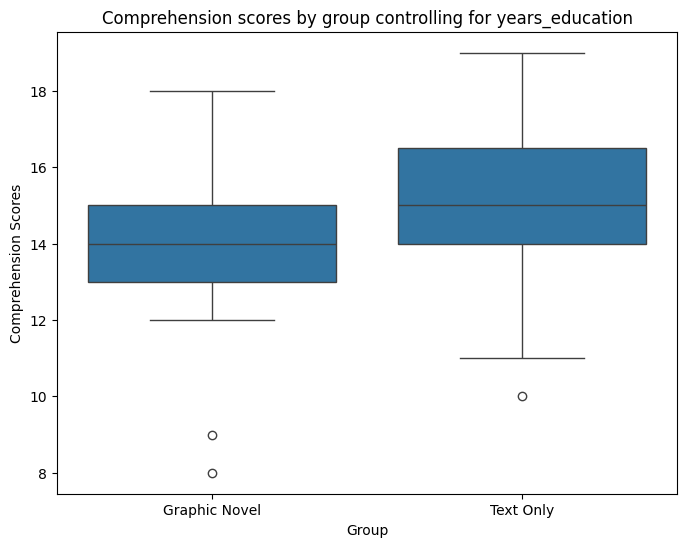

ANCOVA results for cefr_level:
                sum_sq    df         F    PR(>F)
group         6.772347   1.0  1.554383  0.216475
cefr_level   11.570956   1.0  2.655756  0.107484
Residual    318.056209  73.0       NaN       NaN


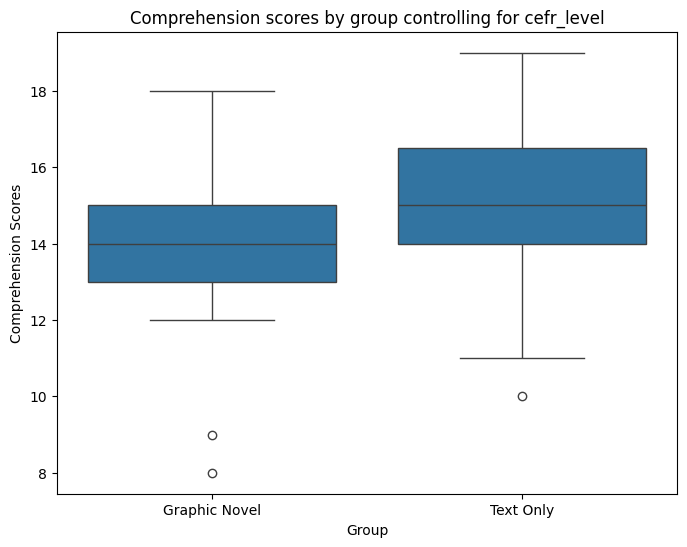

ANCOVA results for percentage:
                sum_sq    df         F    PR(>F)
group         8.384693   1.0  1.917214  0.170382
percentage   10.370833   1.0  2.371357  0.127903
Residual    319.256332  73.0       NaN       NaN


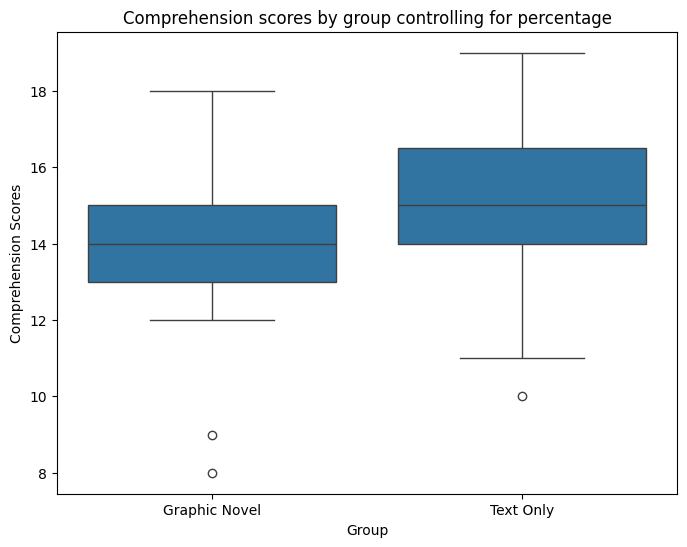

ANCOVA results for TV_movies:
               sum_sq    df         F    PR(>F)
group        9.216798   1.0  2.093155  0.152241
TV_movies    8.185936   1.0  1.859044  0.176925
Residual   321.441230  73.0       NaN       NaN


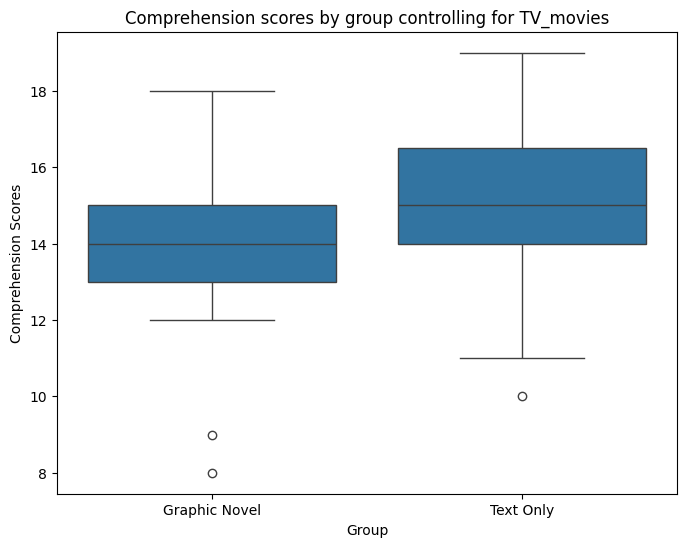

ANCOVA results for music_podcasts:
                    sum_sq    df         F    PR(>F)
group             9.665099   1.0  2.176186  0.144462
music_podcasts    5.412042   1.0  1.218571  0.273267
Residual        324.215123  73.0       NaN       NaN


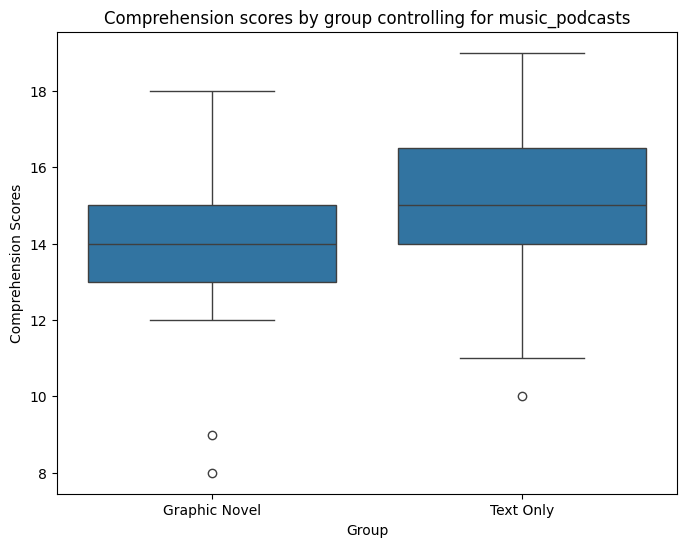

ANCOVA results for pleasure_reading:
                      sum_sq    df         F    PR(>F)
group               4.628887   1.0  1.060500  0.306501
pleasure_reading   10.995734   1.0  2.519176  0.116792
Residual          318.631432  73.0       NaN       NaN


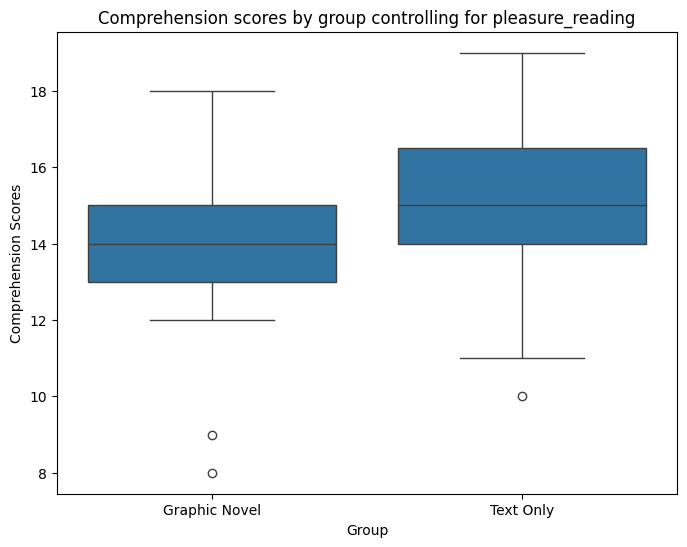

ANCOVA results for academic_reading:
                      sum_sq    df         F    PR(>F)
group               7.690564   1.0  1.719910  0.193814
academic_reading    3.208285   1.0  0.717498  0.399734
Residual          326.418881  73.0       NaN       NaN


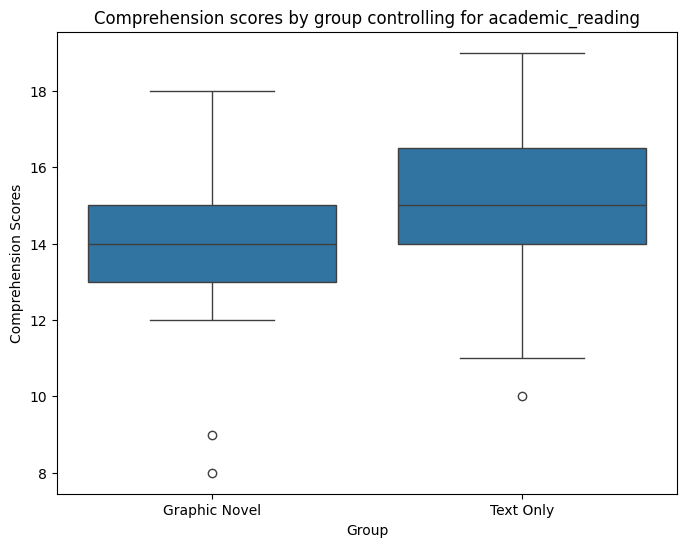

ANCOVA results for friends_family:
                    sum_sq    df         F    PR(>F)
group             7.265351   1.0  1.617501  0.207477
friends_family    1.732145   1.0  0.385631  0.536539
Residual        327.895020  73.0       NaN       NaN


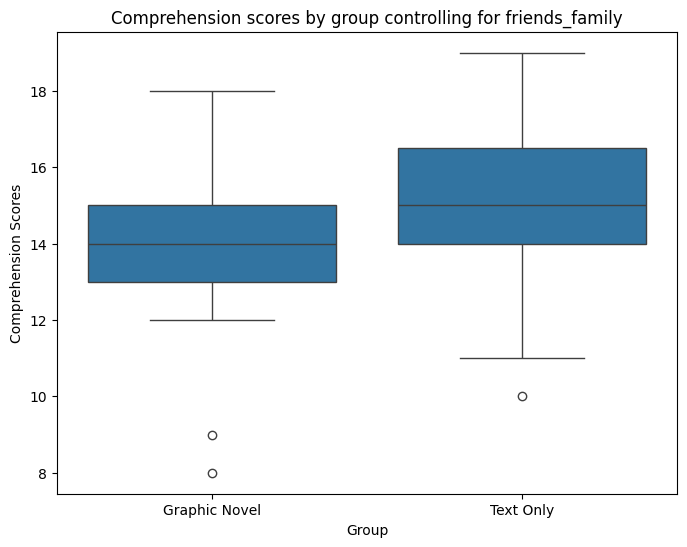

ANCOVA results for emails_messages:
                     sum_sq    df         F    PR(>F)
group              6.127004   1.0  1.371145  0.245423
emails_messages    3.424456   1.0  0.766350  0.384220
Residual         326.202709  73.0       NaN       NaN


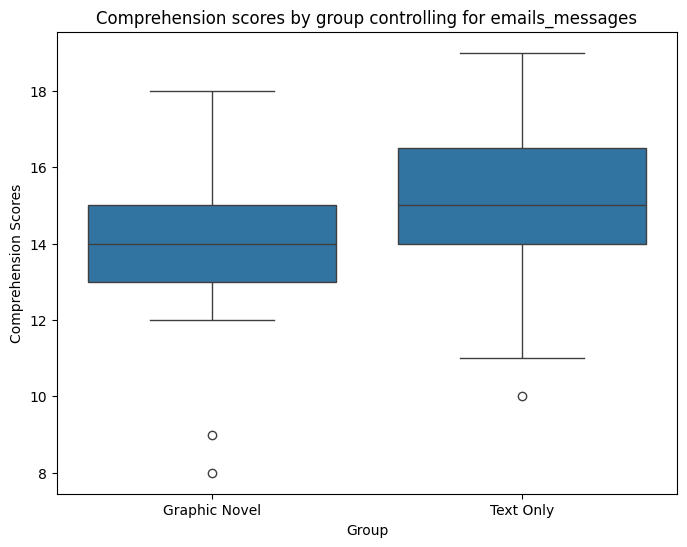

ANCOVA results for social:
              sum_sq    df         F    PR(>F)
group       6.837498   1.0  1.573064  0.213764
social     12.324545   1.0  2.835438  0.096477
Residual  317.302621  73.0       NaN       NaN


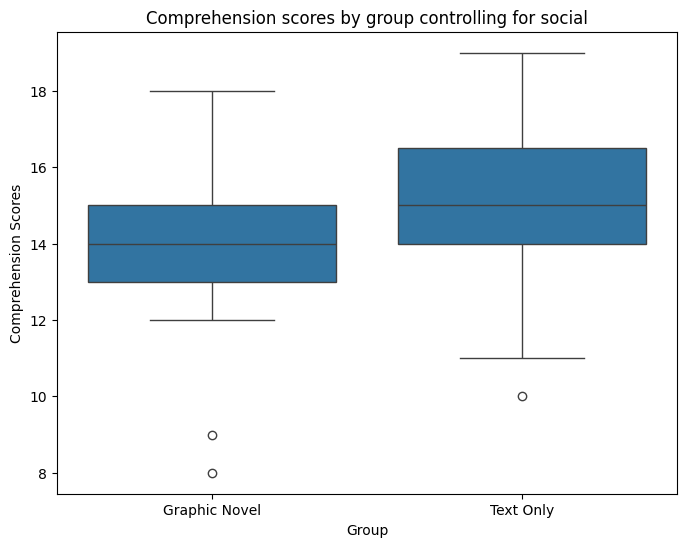

ANCOVA results for news_magazines:
                    sum_sq    df         F    PR(>F)
group             6.229260   1.0  1.386884  0.242757
news_magazines    1.743983   1.0  0.388281  0.535146
Residual        327.883183  73.0       NaN       NaN


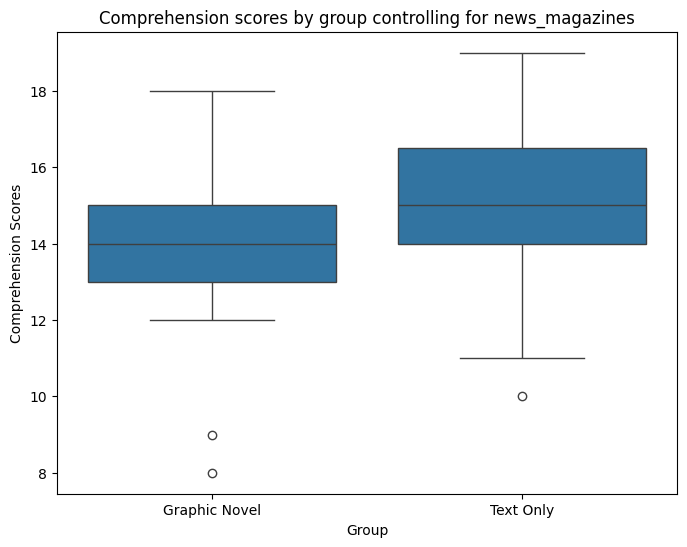

                item   F-value   P-value  Partial Eta Squared
0    years_education  1.805345  0.183229             0.024134
1         cefr_level  1.554383  0.216475             0.020849
2         percentage  1.917214  0.170382             0.025591
3          TV_movies  2.093155  0.152241             0.027874
4     music_podcasts  2.176186  0.144462             0.028948
5   pleasure_reading  1.060500  0.306501             0.014319
6   academic_reading  1.719910  0.193814             0.023018
7     friends_family  1.617501  0.207477             0.021677
8    emails_messages  1.371145  0.245423             0.018437
9             social  1.573064  0.213764             0.021094
10    news_magazines  1.386884  0.242757             0.018644


In [59]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Add 'group' column to each pretest and posttest DataFrame
pretest_gn['group'] = 'Graphic Novel'
pretest_to['group'] = 'Text Only'
postest_gn['group'] = 'Graphic Novel'
postest_to['group'] = 'Text Only'

# Combine pretest and posttest DataFrames
df_pretest_combined = pd.concat([pretest_gn, pretest_to])
df_posttest_combined = pd.concat([postest_gn, postest_to])

# Merge combined pretest data with posttest data on the index
df_combined = df_pretest_combined.join(df_posttest_combined[['Total points', 'group']], rsuffix='_post')

# Rename 'TOTAL POINTS' to 'comprehension' for consistency
df_combined.rename(columns={'Total points': 'comprehension'}, inplace=True)

# Replace special characters in column names
df_combined.columns = df_combined.columns.str.replace('/', '_').str.replace(' ', '_')

# List of pre-test items
pre_test_items = pretest_gn.columns.tolist()  # Assuming all columns in df_pretest_gn are pre-test items
pre_test_items = [item.replace('/', '_').replace(' ', '_') for item in pre_test_items]


# Function to perform ANCOVA and plot results
def perform_ancova(df, pre_test_items):
    ancova_results = []
    
    for item in pre_test_items:
        if item not in ['age','gender','native_language', 'group']:
            # Define the formula for ANCOVA
            formula = f'comprehension ~ {item} + group'
        
            # Fit the ANCOVA model
            model = ols(formula, data=df).fit()
            
            # Perform ANCOVA
            anova_table = sm.stats.anova_lm(model, typ=2)
            print(f'ANCOVA results for {item}:')
            print(anova_table)
            
            # Append results to the list
            ancova_results.append({
                'item': item,
                'F-value': anova_table.loc['group', 'F'],
                'P-value': anova_table.loc['group', 'PR(>F)'],
                'Partial Eta Squared': anova_table.loc['group', 'sum_sq'] / (anova_table.loc['group', 'sum_sq'] + anova_table.loc['Residual', 'sum_sq'])
            })
            
            # Plot the boxplot
            plt.figure(figsize=(8, 6))
            sns.boxplot(x='group', y='comprehension', data=df)
            plt.title(f'Comprehension scores by group controlling for {item}')
            plt.xlabel('Group')
            plt.ylabel('Comprehension Scores')
            plt.show()

    return pd.DataFrame(ancova_results)

# Perform ANCOVA for each pre-test item
ancova_results_df = perform_ancova(df_combined, pre_test_items)
print(ancova_results_df)


<Figure size 1000x600 with 0 Axes>

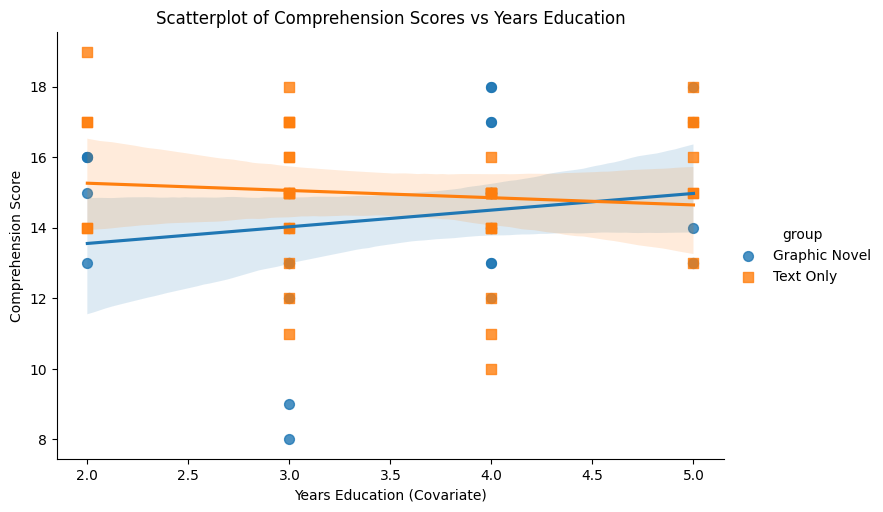

<Figure size 1000x600 with 0 Axes>

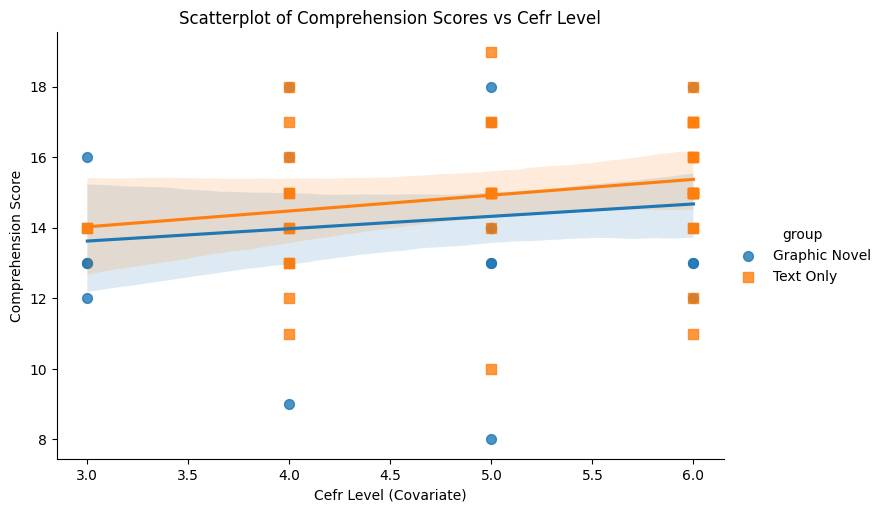

<Figure size 1000x600 with 0 Axes>

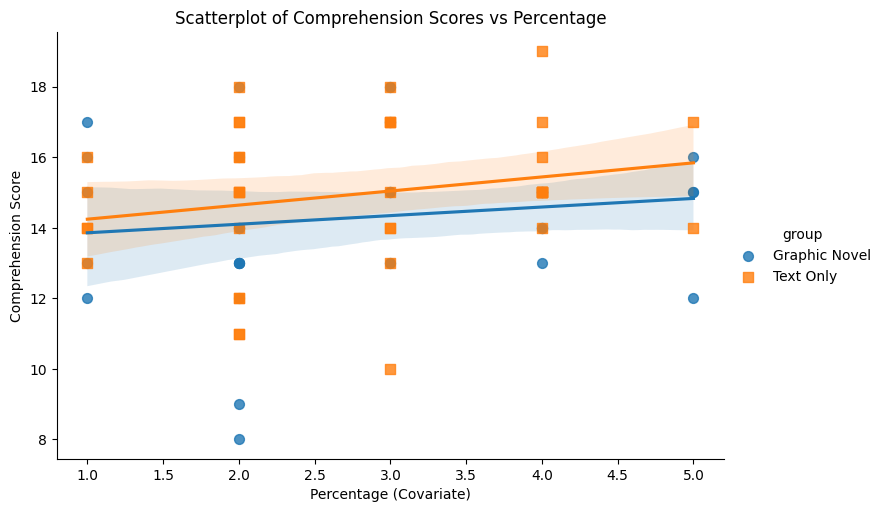

<Figure size 1000x600 with 0 Axes>

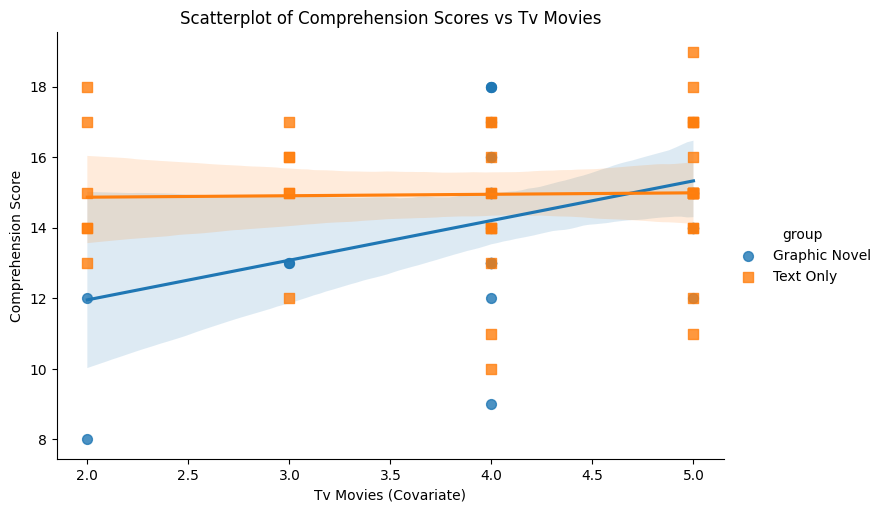

<Figure size 1000x600 with 0 Axes>

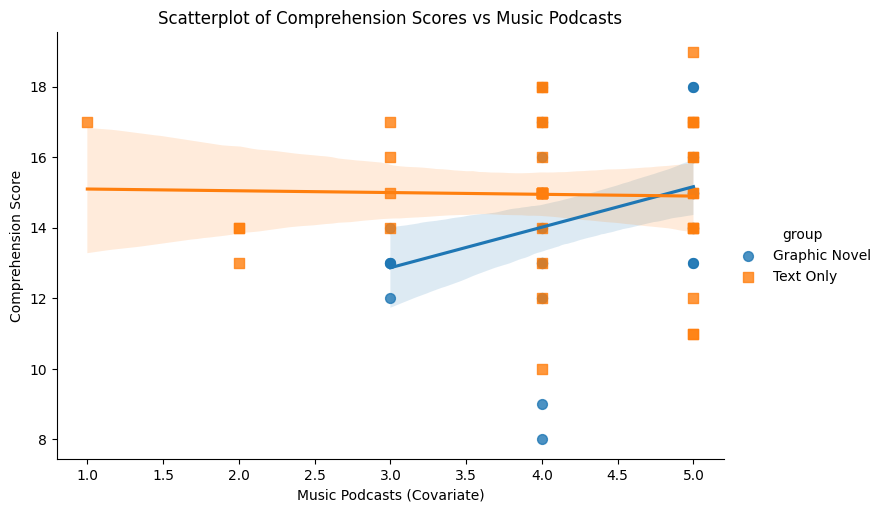

<Figure size 1000x600 with 0 Axes>

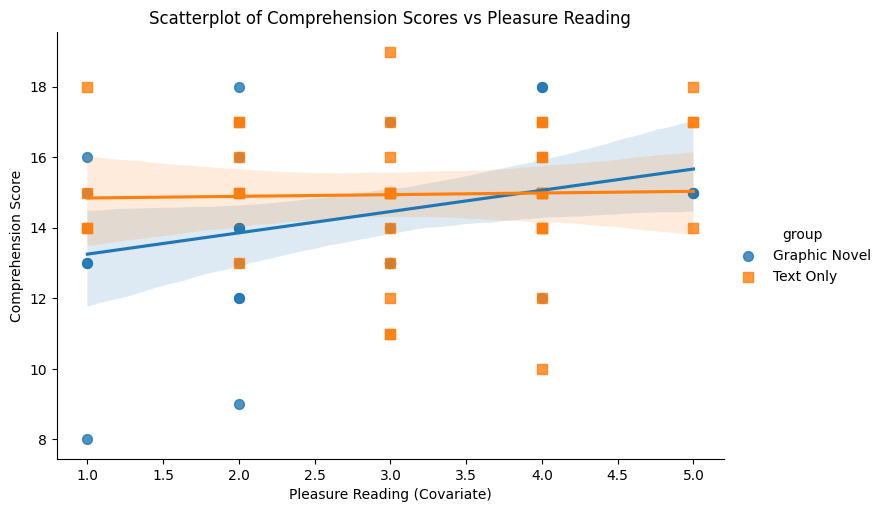

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_combined already exists and is correctly formatted
# Create the scatter plot with regression lines for each pre-test item
def plot_scatter_with_regression(df, pre_test_items):
    for item in pre_test_items:
        if item not in ['age','gender','native_language', 'group']:
            plt.figure(figsize=(10, 6))
            sns.lmplot(x=item, y='comprehension', hue='group', data=df, aspect=1.5, markers=['o', 's'], scatter_kws={'s':50})
            plt.title(f'Scatterplot of Comprehension Scores vs {item.replace("_", " ").title()}')
            plt.xlabel(f'{item.replace("_", " ").title()} (Covariate)')
            plt.ylabel('Comprehension Score')
            plt.show()

# List of pre-test items, replacing / and spaces with underscores to match the column names in df_combined
pre_test_items = df_combined.columns[:9].tolist()  # Assuming the first 9 columns are the pre-test items
pre_test_items = [item.replace('/', '_').replace(' ', '_') for item in pre_test_items]

# Plot the scatter plots with regression lines
plot_scatter_with_regression(df_combined, pre_test_items)
